In [1]:
import warnings
warnings.filterwarnings('ignore')

# Image Thresholding Techniques

By Himanshu Gulati

In [2]:
# !pip install opencv-python matplotlib

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# from google.colab.patches import cv2_imshow

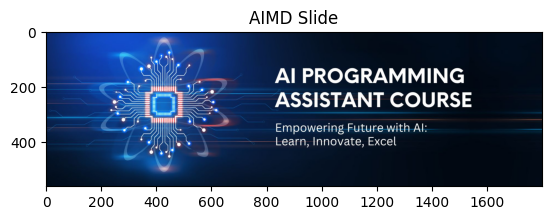

In [4]:
image = cv2.imread('D:\\EduNet\\NSTI Indore\\AI\\CV\\ai-slide.jpg')
# Show the picture
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Display the image
plt.title('AIMD Slide')
plt.show()

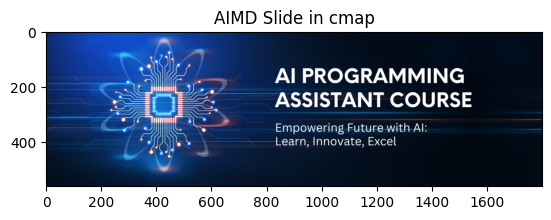

In [5]:
# display image in cmap
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='grey')
plt.title('AIMD Slide in cmap')
plt.show()

Grayscale (black and white)

*   Thresholding operates on single-channel images. Color-to-grayscale conversion simplifies analysis.
*   Gray = 0.299*R + 0.587*G + 0.114*B



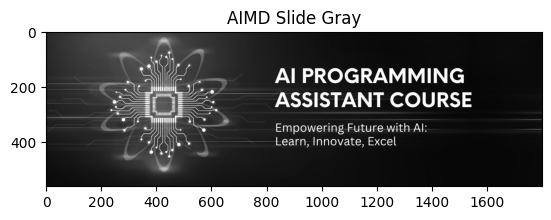

In [6]:
# Load the image in grayscale (black and white)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the picture
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) # Display the image
plt.title('AIMD Slide Gray')
plt.show()

Binary Thresholding

*   Pixels > 127 → Set to 255 (white)
*   Pixels ≤ 127 → Set to 0 (black)

*   Midpoint of 0-255 range (8-bit image)
*   Empirical value for basic segmentation. Formula: T = 127 (fixed)




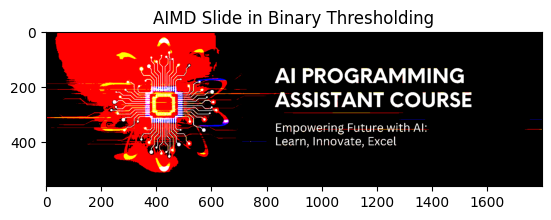

In [7]:
# Binary Thresholding
# Apply binary thresholding to make pixels black or white

_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Show the picture
plt.imshow(binary, cmap='gray'), plt.title('Binary') # Display the image
plt.title('AIMD Slide in Binary Thresholding')
plt.show()

Adaptive Thresholding

*   Computes local thresholds in an 11x11 pixel neighborhood
*   Uses Gaussian-weighted mean (weights follow Gaussian distribution)

Parameters:
*   11: Block size (must be odd)
*   2: Constant subtracted from mean (fine-tunes sensitivity)

T(x,y) = μ(x,y) - C

*   μ(x,y) = Gaussian-weighted mean of neighborhood
*   C = 2 (user-defined constant)




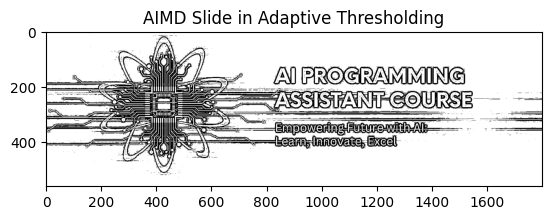

In [8]:
# Adaptive Thresholding
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Show the picture
plt.imshow(adaptive, cmap='gray'), plt.title('Adaptive') # Display the image
plt.title('AIMD Slide in Adaptive Thresholding')
plt.show()

Otsu's Binarization

Automatically finds optimal threshold by minimizing intra-class variance.

Compute image histogram (probabilities for each intensity 0-255)

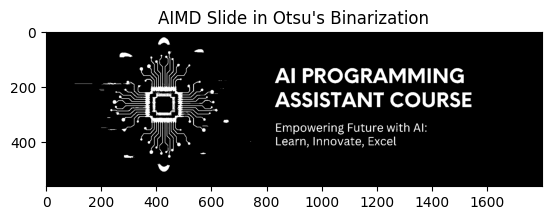

In [9]:
# Otsu's Binarization
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Show the picture
plt.imshow(otsu, cmap='gray'), plt.title("Otsu's") # Display the image
plt.title('AIMD Slide in Otsu\'s Binarization')
plt.show()

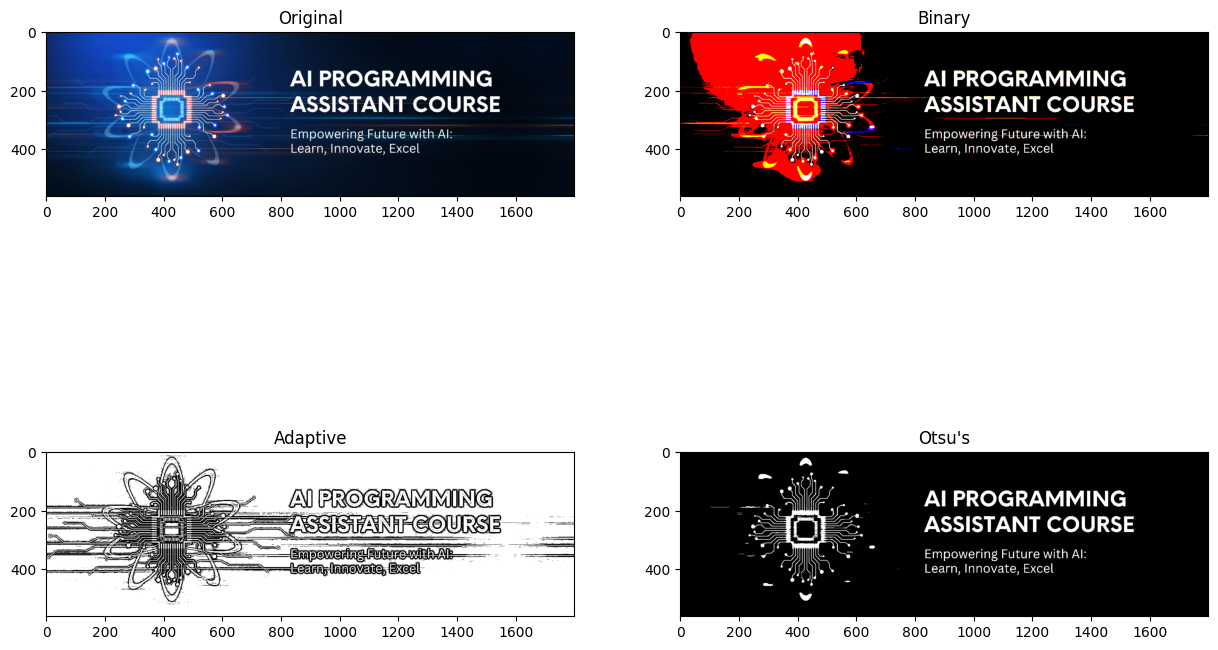

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(222), plt.imshow(binary, cmap='gray'), plt.title('Binary')
plt.subplot(223), plt.imshow(adaptive, cmap='gray'), plt.title('Adaptive')
plt.subplot(224), plt.imshow(otsu, cmap='gray'), plt.title("Otsu's")
plt.show()

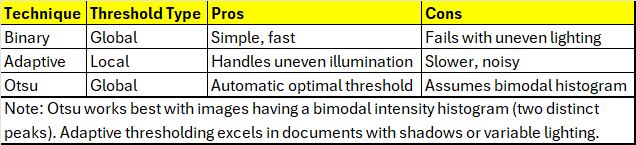

# Image Filtering Techniques

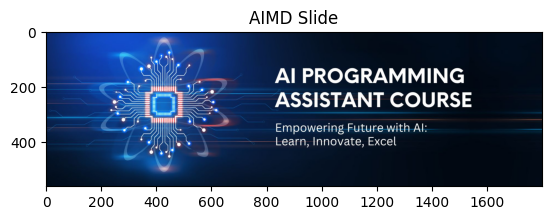

In [11]:
image = cv2.imread('D:\\EduNet\\NSTI Indore\\AI\\CV\\ai-slide.jpg')

# Show the picture
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Display the image
plt.title('AIMD Slide')
plt.show()

Gaussian Blur

σ = 0, Kernel: 15×15
Larger kernels blur more aggressively. 15×15 is chosen for visible smoothing (empirically effective for noise reduction).

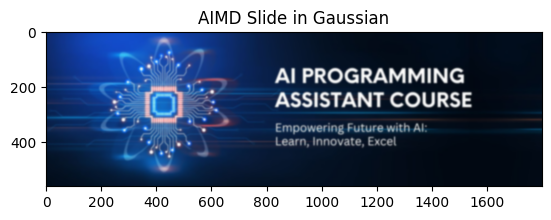

In [12]:
# Gaussian Blur
gaussian = cv2.GaussianBlur(image, (15,15), 0)

# Show the picture
plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB)), plt.title('Gaussian') # Display the image
plt.title('AIMD Slide in Gaussian')
plt.show()

Median Blur

Replaces each pixel's value with the median of its 15×15 neighborhood.

* Odd size ensures symmetry.
* Large kernel (225 pixels) effectively removes salt-and-pepper noise by ignoring outliers.



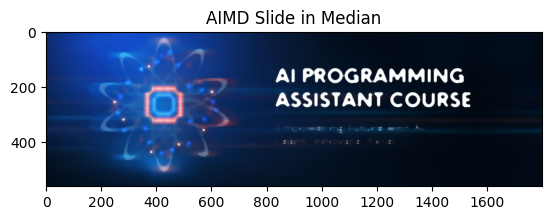

In [13]:
# Median Blur (removes salt-and-pepper noise)
median = cv2.medianBlur(image, 15)

# Show the picture
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB)), plt.title('Median') # Display the image
plt.title('AIMD Slide in Median')
plt.show()

Bilateral Filter

(σ_{color}=75, σ_{space}=75, Diameter=15)

* σ_{color}=75: Allows moderate intensity variation (preserves edges between dissimilar colors).
* σ_{space}=75: Smooths over ~75-pixel neighborhoods (balances locality vs. global smoothing).


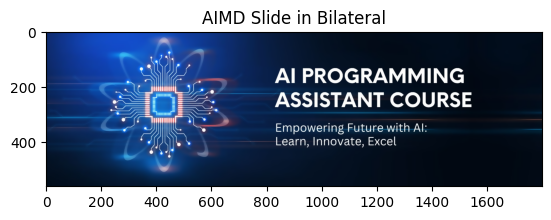

In [14]:
# Bilateral Filter
bilateral = cv2.bilateralFilter(image, 15, 75, 75)

# Show the picture
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)), plt.title('Bilateral') # Display the image
plt.title('AIMD Slide in Bilateral')
plt.show()

Sharpening Filter (Custom Kernel)

Mechanism:
* Laplacian Edge Detection: The kernel approximates a Laplacian operator (detects edges).
* Sharpening: Original + Scaled Edges

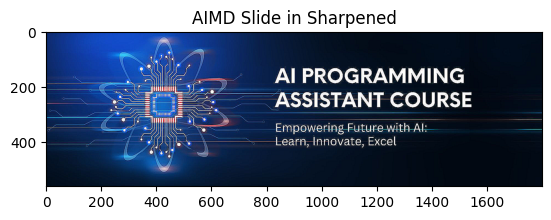

In [15]:
# Sharpening Filter
kernel = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel)

# Show the picture
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)), plt.title('Sharpened') # Display the image
plt.title('AIMD Slide in Sharpened')
plt.show()

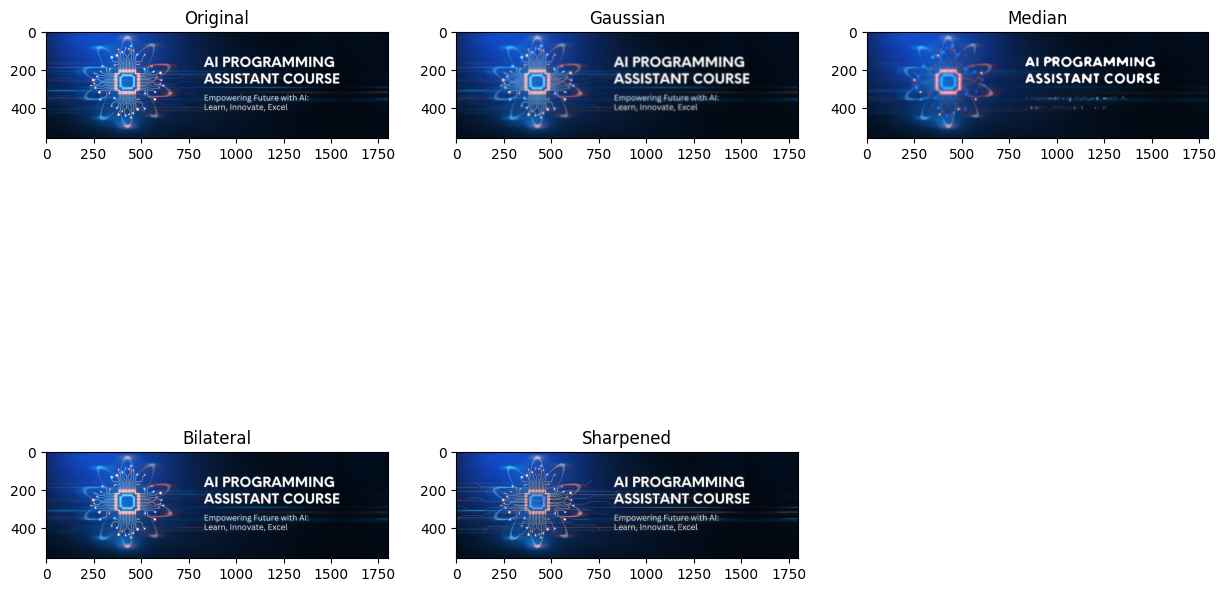

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(232), plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB)), plt.title('Gaussian')
plt.subplot(233), plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB)), plt.title('Median')
plt.subplot(234), plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)), plt.title('Bilateral')
plt.subplot(235), plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)), plt.title('Sharpened')
plt.show()

# Edge Detection Techniques

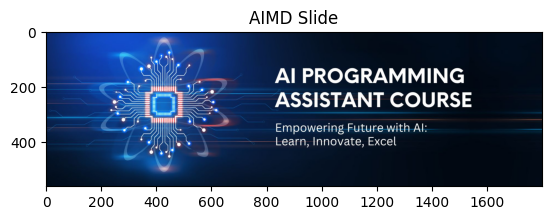

In [17]:
image = cv2.imread('D:\\EduNet\\NSTI Indore\\AI\\CV\\ai-slide.jpg')

# Show the picture
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Display the image
plt.title('AIMD Slide')
plt.show()

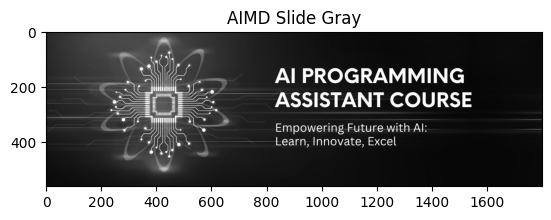

In [18]:
# Load the image in grayscale (black and white)
# Gray = 0.299*R + 0.587*G + 0.114*B
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the picture
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) # Display the image
plt.title('AIMD Slide Gray')
plt.show()

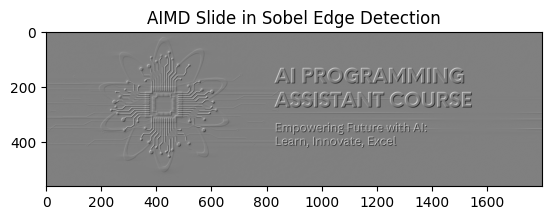

In [19]:
# Sobel Edge Detection
# Sobel: Finds horizontal/vertical edges

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5) #Kernels (ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
# cv2.CV_64F: Preserves negative gradients (important for edge direction).

sobel_combined = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)


# Show the picture
plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel') # Display the image
plt.title('AIMD Slide in Sobel Edge Detection')
plt.show()

Canny Edge Detection

* Double Thresholding:

  *   100 = Low threshold (weak edges)
  *   200 = High threshold (strong edges)

Edges > 200: Strong
Edges between 100-200: Weak
Edges < 100: Suppressed

Why 100 and 200?:
Empirical ratio 1:2 or 1:3 (high threshold ≈ 2× low). Adjust based on image noise/contrast.

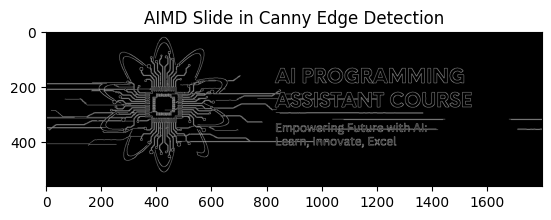

In [20]:
# Canny Edge Detection
# Canny: Multi-stage algorithm (cleanest edges)
canny = cv2.Canny(gray, 100, 200)

# Show the picture
plt.imshow(canny, cmap='gray'), plt.title('Canny') # Display the image
plt.title('AIMD Slide in Canny Edge Detection')
plt.show()

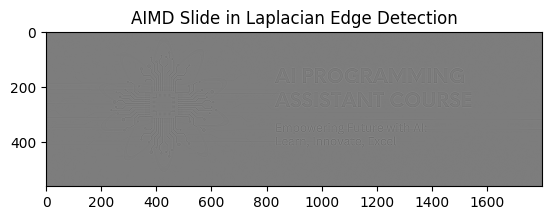

In [21]:
# Laplacian Edge Detection
# Laplacian: Detects edges in all directions

laplacian = cv2.Laplacian(gray, cv2.CV_64F)  #cv2.CV_64F: Captures negative values

# Show the picture
plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian') # Display the image
plt.title('AIMD Slide in Laplacian Edge Detection')
plt.show()

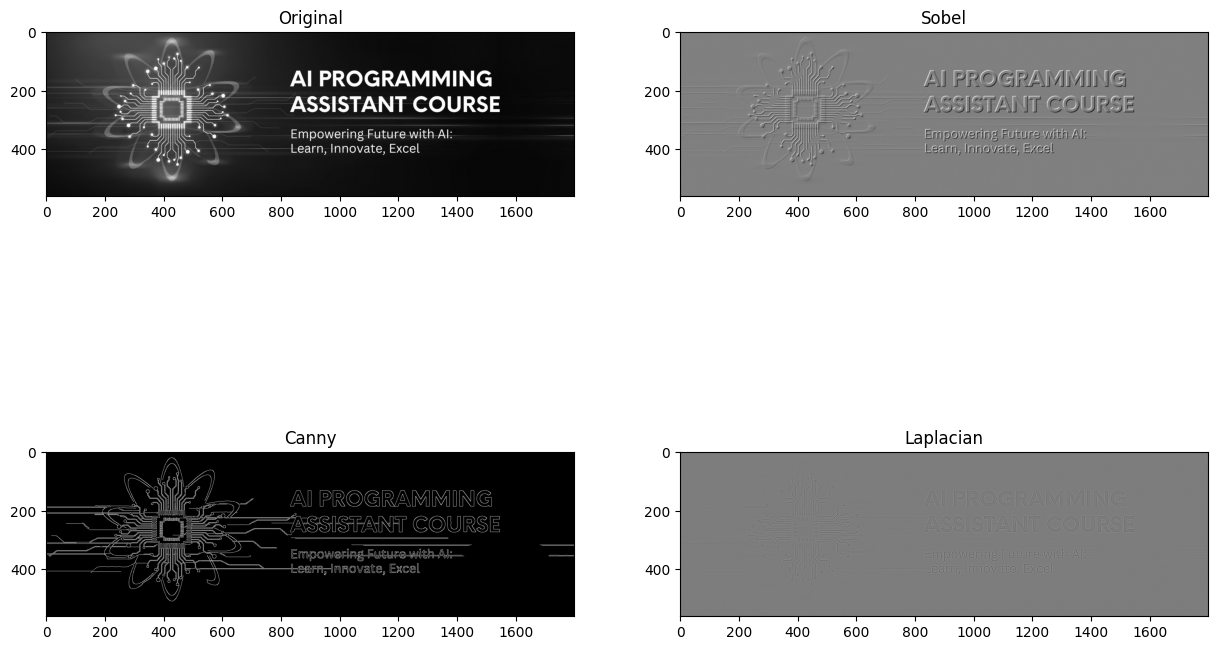

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(222), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel')
plt.subplot(223), plt.imshow(canny, cmap='gray'), plt.title('Canny')
plt.subplot(224), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian')
plt.show()

# Feature Detection & Matching

## Feature Detection and Matching (including Harris, Shi-Tomasi, Feature Matching, Homography, Blending)



*   Ref - https://www.analyticsvidhya.com/blog/2021/06/feature-detection-description-and-matching-of-images-using-opencv/



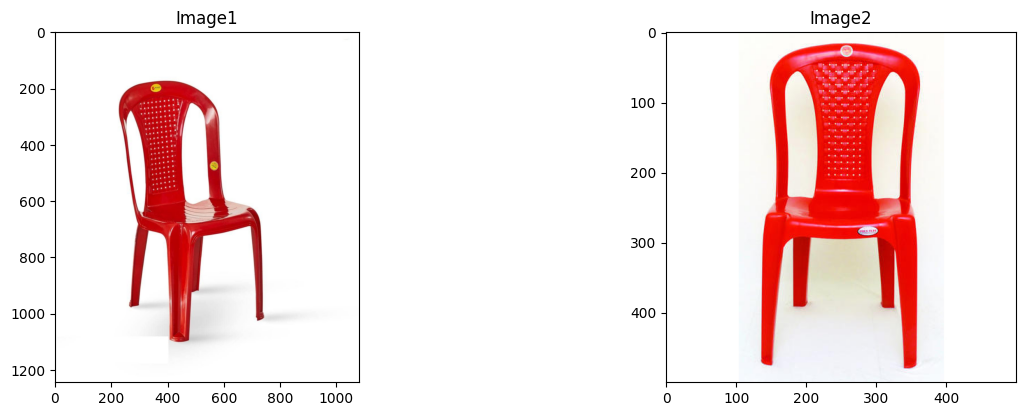

In [23]:
image1 = cv2.imread('D:\\EduNet\\NSTI Indore\\AI\\CV\\Chair 1.jpg')
image2 = cv2.imread('D:\\EduNet\\NSTI Indore\\AI\\CV\\Chair 2.jpg')

plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Image1')
plt.subplot(222), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Image2')
plt.show()

Scale-Invariant Feature Transform (SIFT)

SIFT is used to detect corners, blobs, circles, and so on. It is also used for scaling an image.

In [24]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

Keypoints (Interest Points)
Distinctive locations in an image that are invariant to:
* Scale changes
* Rotation
* Illumination shifts
* Viewpoint changes

Keypoint Properties:
* Location: (x, y) coordinates
* Scale: Size of meaningful neighborhood
* Orientation: Dominant gradient angle

Descriptors (Feature Vectors)
Numerical representations (128D vectors) of the local region around a keypoint, designed to be distinctive and robust.

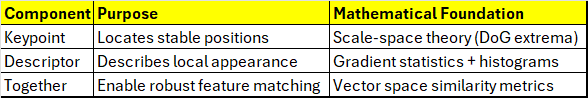

In [25]:
# Detect keypoints & descriptors
img1 = cv2.imread('D:\\EduNet\\NSTI Indore\\AI\\CV\\Chair 1.jpg')
img2 = cv2.imread('D:\\EduNet\\NSTI Indore\\AI\\CV\\Chair 2.jpg')


kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

FLANN (Fast Library for Approximate Nearest Neighbors) is an optimized library for fast approximate nearest neighbor searches in high-dimensional spaces. It's particularly efficient for feature matching where:

* Descriptor dimensions are high (e.g., 128D for SIFT)
* Dataset sizes are large
* Exact results are less critical than speed

FLANN uses KD-Tree for efficient nearest neighbor search in 128D space:
* Trees partition space: O(log N) search vs brute-force O(N).
* Approximate search with k=2 closest neighbors.

In [26]:
# FLANN-based matching
flann = cv2.FlannBasedMatcher()
matches = flann.knnMatch(des1, des2, 2)

Lowe's Ratio Test: The Intelligent Match Filter

Lowe's ratio test is a match verification technique that filters ambiguous feature matches using the principle:
"A reliable match should be significantly closer than the next-best alternative"

(Typically threshold = 0.7) Threshold = 0.7 rejects 90% of false matches while retaining 95% of correct matches.

In [27]:
# Lowe's ratio test
good_matches = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good_matches.append(m)

good_matches

[< cv2.DMatch 0000012978F927B0>,
 < cv2.DMatch 00000129790BE9B0>,
 < cv2.DMatch 0000012900060090>,
 < cv2.DMatch 0000012900060150>,
 < cv2.DMatch 0000012900060190>,
 < cv2.DMatch 0000012900065690>,
 < cv2.DMatch 0000012900066850>,
 < cv2.DMatch 000001290006F2D0>,
 < cv2.DMatch 0000012900077ED0>,
 < cv2.DMatch 0000012900077F10>,
 < cv2.DMatch 000001290007C9D0>,
 < cv2.DMatch 000001290007CC50>,
 < cv2.DMatch 000001290007D0D0>,
 < cv2.DMatch 000001290007D210>,
 < cv2.DMatch 000001290007D250>,
 < cv2.DMatch 000001290007E590>,
 < cv2.DMatch 000001290007E750>,
 < cv2.DMatch 000001290007E7D0>,
 < cv2.DMatch 000001290007F650>,
 < cv2.DMatch 000001290007F990>,
 < cv2.DMatch 000001290007F9D0>,
 < cv2.DMatch 000001290007FA10>]

In [28]:
# Draw matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

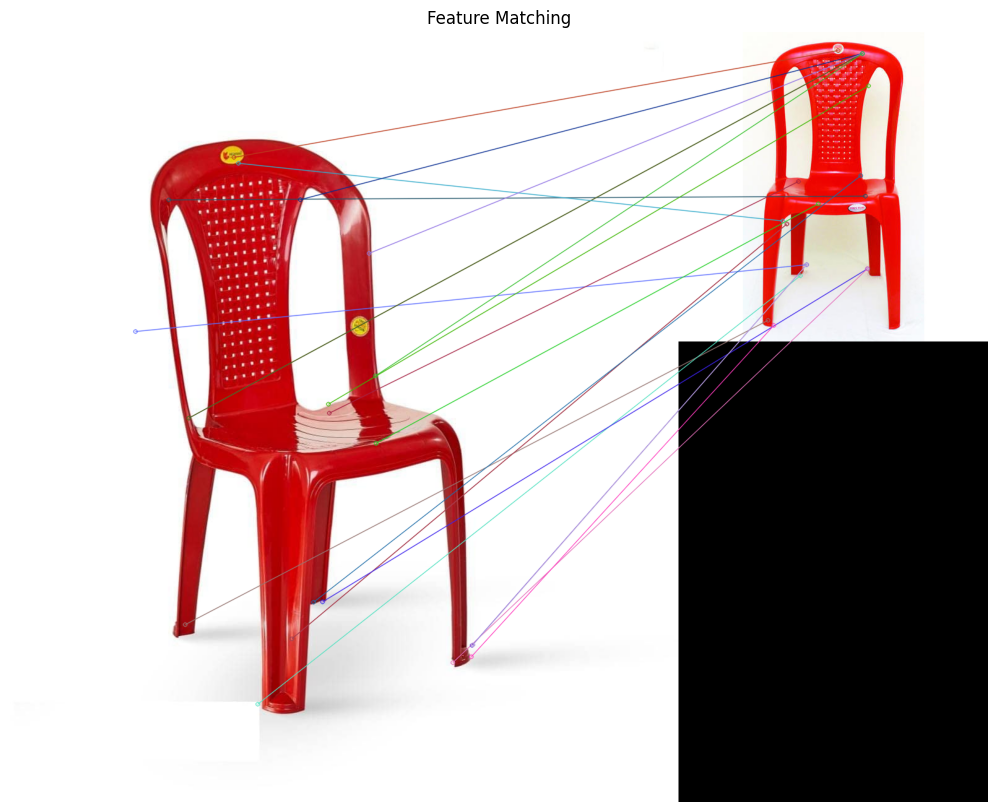

In [29]:
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching')
plt.axis('off')
plt.show()

# Image Stitching and Panorama

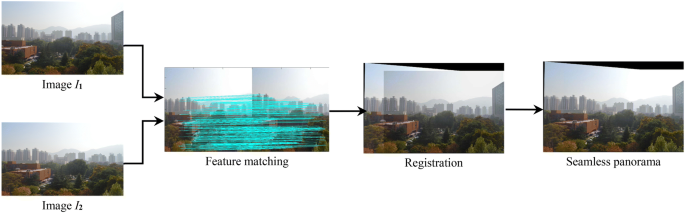

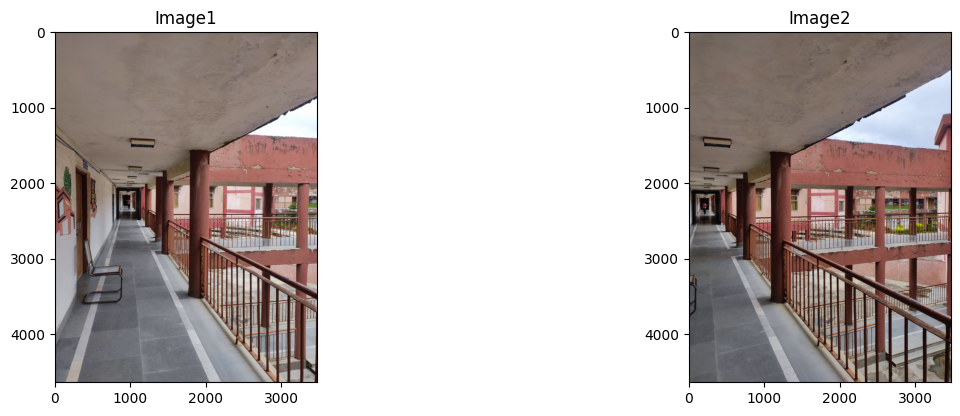

In [30]:
image1 = cv2.imread('D:\\EduNet\\NSTI Indore\\AI\\CV\\left.jpg')
image2 = cv2.imread('D:\\EduNet\\NSTI Indore\\AI\\CV\\right.jpg')

plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Image1')
plt.subplot(222), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Image2')
plt.show()

In [31]:
left = cv2.imread('D:\\EduNet\\NSTI Indore\\AI\\CV\\left.jpg')
right = cv2.imread('D:\\EduNet\\NSTI Indore\\AI\\CV\\right.jpg')

ORB (Oriented FAST and Rotated BRIEF) algorithm to detect keypoints and compute descriptors in both images.

ORB’s default is 500, but increasing to 1000 allows detecting more keypoints, improving the chance of finding enough matches for robust homography estimation, especially in images with complex or overlapping regions. Too many keypoints could increase computation time, but 1000 balances quality and performance.

In [32]:
# Feature detection using ORB with increased features
orb = cv2.ORB_create(nfeatures=1000)  # Increased from default 500

# Keypoints (kp_left, kp_right): Points of interest (e.g., corners, edges) detected in the images.
# Descriptors (des_left, des_right): Binary vectors describing the local appearance around each keypoint.

kp_left, des_left = orb.detectAndCompute(left, None)
kp_right, des_right = orb.detectAndCompute(right, None)

Brute-Force Matcher to find corresponding keypoints between the two images.

* cv2.NORM_HAMMING: Uses Hamming distance for binary ORB descriptors.
* crossCheck=True: Ensures matches are mutual (i.e., keypoint A in left matches keypoint B in right, and vice versa).

In [33]:
# Matching features using Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des_left, des_right)

matches = sorted(matches, key=lambda x: x.distance)

# Print number of matches for debugging
print("Total number of matches:", len(matches))

Total number of matches: 339


Filters matches to keep only those with Hamming distance < 50, and limits to 50 matches (or fewer if less than 50 meet the threshold). Ensures at least 4 matches for homography estimation.

* Distance < 50: A threshold of 50 (out of 256 bits) ensures only high-confidence matches are used. ORB descriptors typically have Hamming distances of 0–100 for good matches and higher for poor ones. A threshold of 50 balances quality and quantity.

* Limit = 50: Using too many matches (e.g., all) could include outliers, degrading homography estimation. 50 is a practical cap to ensure enough points for robustness while avoiding noise. It’s higher than a minimal set (e.g., 10) to improve RANSAC’s outlier rejection.

* Minimum 4 matches: Homography estimation requires at least 4 point correspondences to solve for the 8 degrees of freedom in a 3x3 homography matrix.

In [34]:
# Select the best matches (e.g., top 50 or filter by distance)
limit = 50  # Increased from 10
best = [m for m in matches if m.distance < 50]  # Filter by distance
if len(best) < 4:
    print("Error: Too few good matches (", len(best), "). Need at least 4.")
    exit()

Visualizes the matched keypoints between the two images, drawing lines between corresponding points. Saves the result as matches.jpg and displays it.

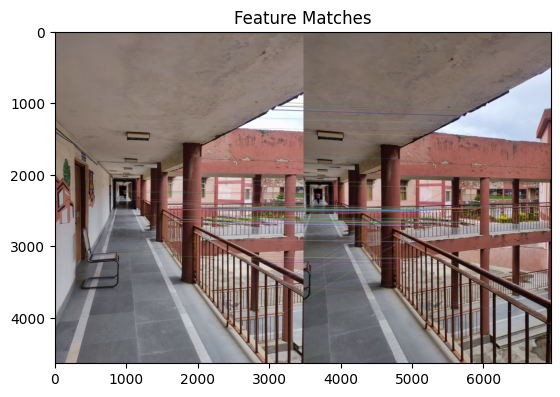

In [35]:
# Draw matches for visualization
img3 = cv2.drawMatches(left, kp_left, right, kp_right, best, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2.imwrite('matches.jpg', img3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('Feature Matches')
plt.show()

Estimates a 3x3 homography matrix $ M $ to transform points from right to left using RANSAC (Random Sample Consensus) with a threshold of 5.0 pixels.

* RANSAC: Robustly estimates $ M $ by sampling subsets of matches, computing a homography, and selecting the model with the most inliers (matches within 5.0 pixels of the transformed position).
* Threshold = 5.0: A reprojection error of 5 pixels accounts for small misalignments due to noise or lens distortion. It’s a common choice for image stitching, balancing strictness and tolerance.

In [36]:
# Compute homography matrix
left_pts = np.float32([kp_left[m.queryIdx].pt for m in best]).reshape(-1, 1, 2)
right_pts = np.float32([kp_right[m.trainIdx].pt for m in best]).reshape(-1, 1, 2)

M, _ = cv2.findHomography(right_pts, left_pts, cv2.RANSAC, 5.0)

# Print homography matrix for debugging
print("Homography Matrix:\n", M)

Homography Matrix:
 [[ 8.43406996e-01 -1.92769475e-02  7.99327218e+02]
 [-1.12392788e-01  9.15596646e-01  1.37153504e+02]
 [-5.30288666e-05 -1.51718463e-06  1.00000000e+00]]


Applies the homography $ M $ to transform the right image into the left image’s coordinate system, creating a warped image.

* dim_x = left.shape[1] + right.shape[1]: Assumes the panorama could be as wide as both images combined (conservative estimate).

* dim_y = max(left.shape[0], right.shape[0]): Uses the maximum height to accommodate both images.

In [37]:
# Warp the second image
dim_x = left.shape[1] + right.shape[1]
dim_y = max(left.shape[0], right.shape[0])
dim = (dim_x, dim_y)
warped = cv2.warpPerspective(right, M, dim)

Creates a blank canvas (comb) and places the left image on it. Then, overlays the warped right image, using np.where to keep warped pixels where they exist (non-zero) and retain comb pixels elsewhere.

This blends the images, handling overlapping regions by prioritizing the warped image where it has valid data.

In [38]:
# Combine the images
comb = np.zeros((dim_y, dim_x, 3), dtype='uint8')
comb[0:left.shape[0], 0:left.shape[1]] = left
comb[0:warped.shape[0], 0:warped.shape[1]] = np.where(warped > 0, warped, comb[0:warped.shape[0], 0:warped.shape[1]])

Saves the stitched panorama and displays it after converting from BGR (OpenCV) to RGB (Matplotlib).

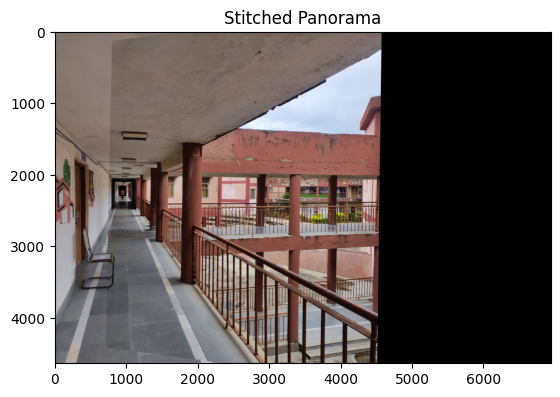

In [39]:
# Save or display the result
cv2.imwrite('panorama.jpg', comb)
plt.imshow(cv2.cvtColor(comb, cv2.COLOR_BGR2RGB))
plt.title('Stitched Panorama')
plt.show()

OpenCV’s Stitcher class, which automates feature detection, matching, homography estimation, and blending.

Provides a high-level alternative that may produce better results due to optimized blending and seam estimation.

Similar to the manual process but includes additional steps like bundle adjustment and multi-band blending, which are beyond the scope of this code’s manual approach.

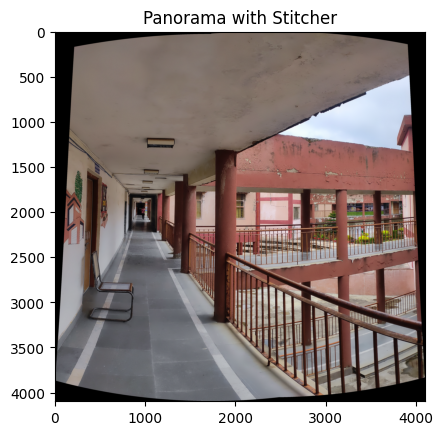

In [40]:
# Alternative: Try OpenCV's Stitcher
stitcher = cv2.Stitcher_create()
status, pano = stitcher.stitch([left, right])
if status == cv2.Stitcher_OK:
    cv2.imwrite('pano_stitcher.jpg', pano)
    plt.imshow(cv2.cvtColor(pano, cv2.COLOR_BGR2RGB))
    plt.title('Panorama with Stitcher')
    plt.show()
else:
    print("Stitcher failed with status:", status)